Step 1: Import Libraries and Load the Dataset
Explanation: We first import necessary libraries and load the dataset education_career_success.csv.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
data = pd.read_csv('education_career_success.csv')

# Display the first few rows of the dataset to understand the structure
data.head()


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


Step 2: Explanation - NLP Methods (Sentiment Analysis)
Explanation: We will perform sentiment analysis on text columns (such as Field_of_Study or Career_Satisfaction) using the VADER Sentiment Analyzer from nltk. We will also visualize the sentiment distribution.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


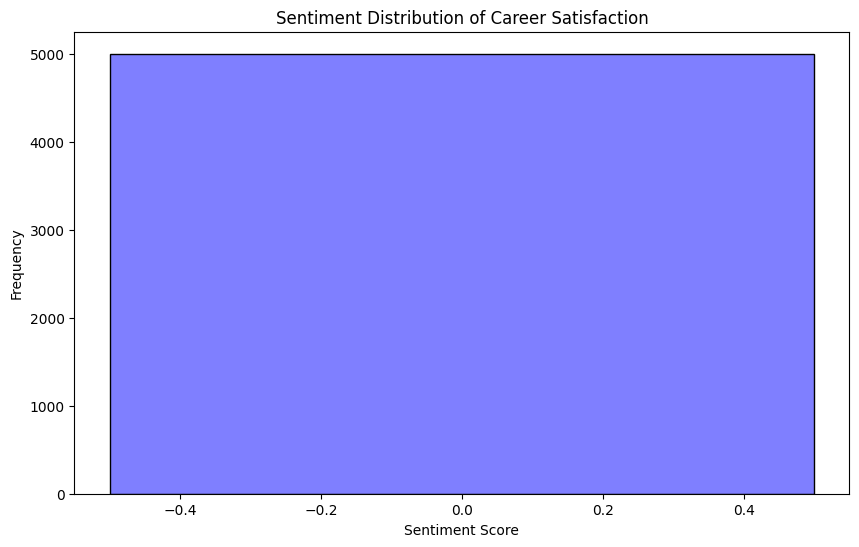

In [4]:
# Perform Sentiment Analysis on Career Satisfaction (assuming it's a text-based column)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis on 'Career_Satisfaction' text column (adjust as needed for your dataset)
data['Sentiment'] = data['Career_Satisfaction'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment'], kde=True, color='blue')
plt.title('Sentiment Distribution of Career Satisfaction')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


Step 3: Explanation - Topic Modeling (LDA)
Explanation: Next, we apply Latent Dirichlet Allocation (LDA) topic modeling to the Field_of_Study column to discover underlying topics.

In [5]:
# Preprocess the data for topic modeling
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Field_of_Study'].dropna())

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i + 1}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")


Topic 1:
['computer', 'science', 'law', 'business', 'engineering', 'arts', 'medicine', 'mathematics']


Topic 2:
['computer', 'science', 'mathematics', 'business', 'engineering', 'arts', 'medicine', 'law']


Topic 3:
['law', 'mathematics', 'business', 'engineering', 'arts', 'medicine', 'computer', 'science']


Topic 4:
['computer', 'science', 'law', 'mathematics', 'business', 'engineering', 'medicine', 'arts']


Topic 5:
['computer', 'science', 'law', 'mathematics', 'arts', 'medicine', 'engineering', 'business']




Step 4: Prediction - Supervised Machine Learning Models
Explanation: We apply a supervised machine learning model (Linear Regression) to predict Starting_Salary based on other variables such as Age, High_School_GPA, University_Ranking, etc.

In [6]:
# Prepare the dataset for prediction
X = data[['Age', 'High_School_GPA', 'SAT_Score', 'University_Ranking', 'University_GPA',
          'Soft_Skills_Score', 'Networking_Score', 'Internships_Completed', 'Projects_Completed',
          'Certifications']]
y = data['Starting_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error (MAE): 11835.304955541527
Mean Squared Error (MSE): 213133654.97977978
R-squared: -0.0013276796639676292


Step 5: Causal Inference - Regression Discontinuity Design (RD)
Explanation: We now apply Regression Discontinuity (RD) to estimate the treatment effect of Internship Completed on Starting Salary, using a cutoff for internship participation (e.g., GPA >= 3.5).

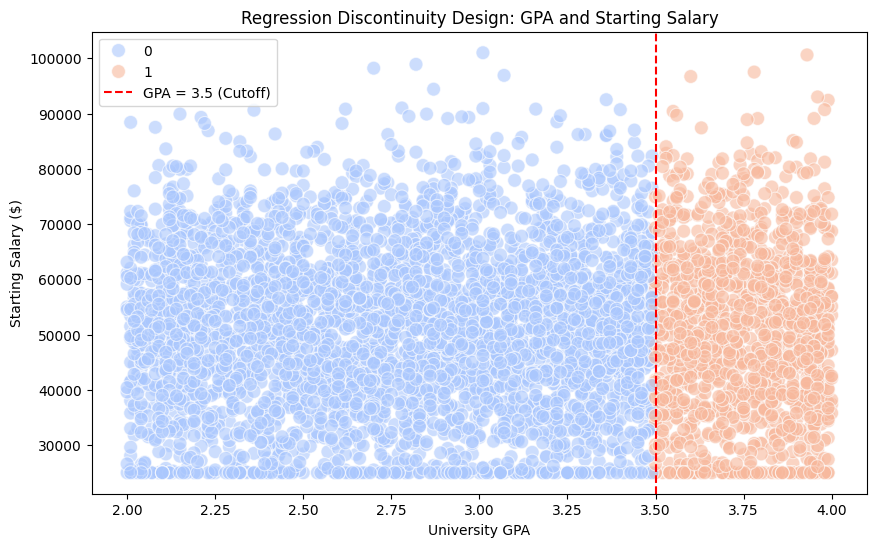

In [7]:
# Define the running variable (GPA) and treatment assignment (Internships Completed based on GPA cutoff)
gpa_cutoff = 3.5
data['Treatment'] = (data['University_GPA'] >= gpa_cutoff).astype(int)

# Perform a scatter plot to visualize the RD Design
plt.figure(figsize=(10, 6))
sns.scatterplot(x='University_GPA', y='Starting_Salary', data=data, hue='Treatment', palette="coolwarm", s=100, alpha=0.6)
plt.axvline(x=gpa_cutoff, color='red', linestyle='--', label='GPA = 3.5 (Cutoff)')
plt.title('Regression Discontinuity Design: GPA and Starting Salary')
plt.xlabel('University GPA')
plt.ylabel('Starting Salary ($)')
plt.legend()
plt.show()


Step 6: Causal Inference - Estimation of Treatment Effect
Explanation: We estimate the treatment effect of internship completion on starting salary by fitting a linear regression model that includes the treatment variable.

In [9]:
# Perform linear regression to estimate the treatment effect
X_rd = sm.add_constant(data[['University_GPA', 'Treatment']])  # Adding intercept term
y_rd = data['Starting_Salary']

# Fit the model
model_rd = sm.OLS(y_rd, X_rd).fit()

# Print the summary of the regression model
print(model_rd.summary())


                            OLS Regression Results                            
Dep. Variable:        Starting_Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6928
Date:                Tue, 25 Feb 2025   Prob (F-statistic):              0.500
Time:                        14:39:49   Log-Likelihood:                -55001.
No. Observations:                5000   AIC:                         1.100e+05
Df Residuals:                    4997   BIC:                         1.100e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.926e+04   1510.786     32.

Step 7: Causal Inference - Refutation with Sensitivity Analysis
Explanation: We test the robustness of our RD model by changing the cutoff point for treatment (e.g., GPA = 3.6) and checking if the treatment effect estimate remains stable.

In [10]:
# Shift the cutoff to GPA = 3.6
new_cutoff = 3.6
data['Treatment_new'] = (data['University_GPA'] >= new_cutoff).astype(int)

# Perform linear regression with the new treatment variable
X_rd_new = sm.add_constant(data[['University_GPA', 'Treatment_new']])
model_rd_new = sm.OLS(y_rd, X_rd_new).fit()

# Print the new regression model summary
print(model_rd_new.summary())


                            OLS Regression Results                            
Dep. Variable:        Starting_Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3824
Date:                Tue, 25 Feb 2025   Prob (F-statistic):              0.682
Time:                        14:39:53   Log-Likelihood:                -55002.
No. Observations:                5000   AIC:                         1.100e+05
Df Residuals:                    4997   BIC:                         1.100e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.971e+04   1411.712     35.